### import data and packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('D:/online job posts/data job posts.csv')

In [3]:
data.date=pd.to_datetime(data.date,errors = 'coerce')

In [4]:
data

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,2004-01-05,Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,2004-01-07,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,2004-01-07,Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,2004-01-07,BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,2004-01-10,Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,2015-12-28,Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\n...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",2015-12-30,Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",2015-12-30,Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,2015-12-30,Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\n...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


### #1

In [5]:
data.Title.sort_values(ascending=False)

9059        iPhone/ iPad Software Developer
8407     iPhone/ iPad Application Developer
13617    iPhone/ iPad Application Developer
13297    iPhone/ iPad Application Developer
14575          iPhone Application Developer
                        ...                
11349                                   NaN
11354                                   NaN
15246                                   NaN
15498                                   NaN
15681                                   NaN
Name: Title, Length: 19001, dtype: object

In [6]:
dicti={}
keys=data.Year.unique()
for i in keys:
    dicti[i]=(data[data.Year==i].Title.value_counts().head(5))

In [7]:
pd.DataFrame(dicti).T.plot(kind='bar',stacked=True,figsize=(14,10))


In [8]:
data.Year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

### #2

In [9]:
data.RequiredQual=data.RequiredQual.astype('object')

In [10]:
data.RequiredQual=data.RequiredQual.apply(str)

In [11]:
data.RequiredQual.dropna(inplace=True)

In [12]:
data.RequiredQual=data.RequiredQual

In [13]:
type(data.RequiredQual[10])

str

In [14]:
data[data.Year==2004].RequiredQual[10].split('\nREMUNERATION')[0].replace('\n' ,'').replace('-','').split(';')

['nan']

In [15]:
skill_dict_year=[]
for year in data.Year.unique():
    l1=[]
    for i in range(len(data[data.Year==year])):
        data_df=data[data.Year==year].reset_index(drop=True)
        l1.append(data_df.RequiredQual[i].split('\nREMUNERATION')[0].replace('\n' ,'').replace('-','').split(';'))
    flat_list = []
    for sublist in l1:
        for item in sublist:
            flat_list.append(item)
    l_year=[]
    for fl in flat_list:
        l_year.append(year)
    ldf=pd.DataFrame({'Year':l_year,'Req_Qual':flat_list})    
    skill_dict_year.append(ldf)

In [16]:
skill_dict_year_df=pd.concat(skill_dict_year)

### The desired characteristics and skill-set of the candidates based on the job description are 

In [17]:
skill_dict_year_df

,Year,Req_Qual
0,2004,"To perform this job successfully, anindividual..."
1,2004,Local accounting standards and legislation
2,2004,State reporting requirements pertaining to ac...
3,2004,Principles and practices of financial managem...
4,2004,Principles and practices of financial systems...
...,...,...
19391,2015,Ability to work in a high pressure environment
19392,2015,Ability to find solutions in tense situations
19393,2015,Communication and negotiation skills
19394,2015,Ability to work in a team


In [18]:
skill_dict_year_df.Req_Qual.value_counts().head(5)

 Higher education                  1111
 University degree                  769
 Excellent communication skills     718
 Ability to work under pressure     580
 Good communication skills          561
Name: Req_Qual, dtype: int64

In [19]:
dicti={}
keys=data.Year.unique()
for i in keys:
    dicti[i]=(skill_dict_year_df[skill_dict_year_df.Year==i].Req_Qual.value_counts().head(5))

### And the desired characteristics changing over time are as follows

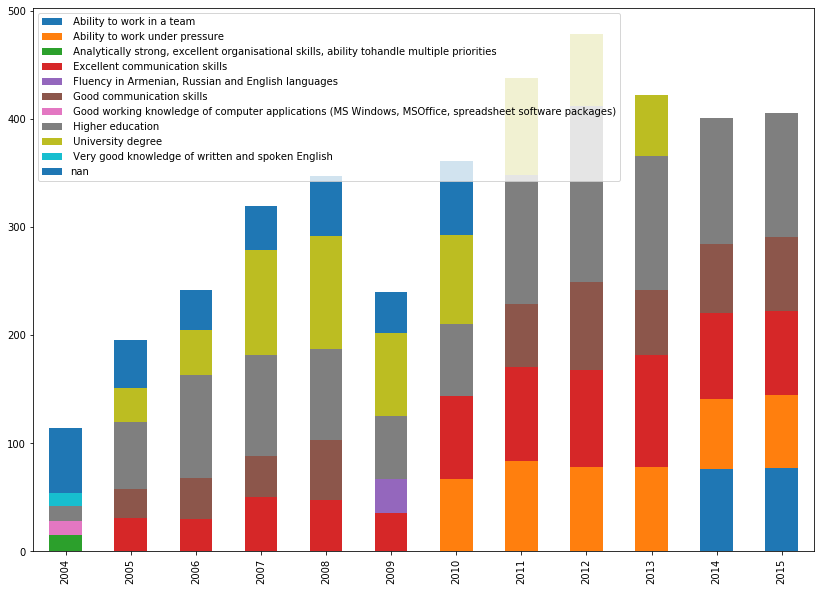

In [20]:
pd.DataFrame(dicti).T.plot(kind='bar',stacked=True,figsize=(14,10))


### #3
###  Building a classifier that can tell  the job description and company description whether a job is IT or not

In [21]:
data_clas=data.loc[:,['Title','JobRequirment','AboutC','RequiredQual','IT']].dropna().reset_index(drop=True)

In [22]:
data_clas.reset_index(drop=True)

,Title,JobRequirment,AboutC,RequiredQual,IT
0,Country Coordinator,- Working with the Country Director to provide...,The Caucasus Environmental NGO Network is a\nn...,"- Degree in environmentally related field, or ...",False
1,Marketing Advisor,- Lead the effort to identify targets of oppor...,ACDI/VOCA is an international development and ...,- 10+ years of actual commercial marketing exp...,False
2,Manufacturing Chief,- To manage all manufacturing functions in the...,ARQELL CJSC is a multidisciplinary manufacturi...,- Degree in Mechanical Engineering or related ...,False
3,Administrative Assistant/ Secretary,- To welcome visitors;\n- To organize and foll...,Accion Contra el Hambre (ACH) is a Spanish hum...,- Minimum two years relevant professional expe...,False
4,Salesman / Trade agent,- To distribute and display imported confectio...,Interagent LLC is a distributor of several mul...,- 20-35 years old\n- Valid driver's license\n-...,False
...,...,...,...,...,...
10920,.NET Developer,- Participate in all the steps of the software...,Macadamian AR is a global software development...,- 2 - 5 years of experience in software develo...,True
10921,Deputy Director,- Support the Director in organizing the activ...,"The ""Transport PIU"" SI (PIU) of the RA Ministr...","- University degree in Civil Engineering, Econ...",False
10922,Senior Creative UX/ UI Designer,- Work closely with product and business teams...,As a company Technolinguistics has a mandate t...,- At least 5 years of experience in Interface/...,False
10923,Head of Online Sales Department,- Handle the project activites of the online s...,San Lazzaro LLC works with several internation...,- At least 1 year of experience in online sale...,False


In [23]:
Y=data_clas.IT

In [24]:
# merging all the x var to make one
data_clas['X1'] = data_clas['Title'].str.cat(data_clas['JobRequirment'], sep =" ").str.cat(data_clas['RequiredQual'], sep =" ")
X=data_clas['X1']

In [25]:
X

0        Country Coordinator - Working with the Country...
1        Marketing Advisor - Lead the effort to identif...
2        Manufacturing Chief - To manage all manufactur...
3        Administrative Assistant/ Secretary - To welco...
4        Salesman / Trade agent - To distribute and dis...
                               ...                        
10920    .NET Developer - Participate in all the steps ...
10921    Deputy Director - Support the Director in orga...
10922    Senior Creative UX/ UI Designer - Work closely...
10923    Head of Online Sales Department - Handle the p...
10924    Lawyer in Legal Department - Properly provide ...
Name: X1, Length: 10925, dtype: object

### creating corpus

In [26]:
import re
corpus = []
for i in range(len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [27]:
corpus[0]

'country coordinator working with the country director to provide environmental information to the general public via regular electronic communications and serving as the primary local contact to armenian ngos and businesses and the armenian offices of international organizations and agencies helping to organize and prepare cenn seminars workshops participating in defining the strategy and policy of cenn in armenia the caucasus region and abroad degree in environmentally related field or 5 years relevant experience oral and written fluency in armenian russian and english knowledge experience of working with environmental issues specific to armenia is plus remuneration salary commensurate with experience '

In [28]:
from nltk import PorterStemmer,WordNetLemmatizer

In [29]:
from nltk.corpus import stopwords

In [30]:
import nltk

In [31]:
stemmer=PorterStemmer()

In [32]:
for i in range(len(corpus)):
    words=nltk.word_tokenize(corpus[i])
    words=[stemmer.stem(word) for word in words]
    corpus[i]=' '.join(words)

In [33]:
corpus[0]

'countri coordin work with the countri director to provid environment inform to the gener public via regular electron commun and serv as the primari local contact to armenian ngo and busi and the armenian offic of intern organ and agenc help to organ and prepar cenn seminar workshop particip in defin the strategi and polici of cenn in armenia the caucasu region and abroad degre in environment relat field or 5 year relev experi oral and written fluenci in armenian russian and english knowledg experi of work with environment issu specif to armenia is plu remuner salari commensur with experi'

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# Creating the Tf-Idf model directly
tf=TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))

In [36]:
X=tf.fit_transform(corpus).toarray()

In [37]:
X.shape

(10925, 376)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=1234)

### building Logistic model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lc=LogisticRegression()

In [42]:
lc.fit(train_x,train_y)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lc.predict(test_x)

array([False, False, False, ..., False,  True, False])

### Evaluation of model

In [44]:
from sklearn import metrics

In [45]:
print('Accuracy score at test data: ',metrics.accuracy_score(test_y,lc.predict(test_x)))

Accuracy score at test data:  0.9228187919463087


In [46]:
print('Accuracy score at training data: ',metrics.accuracy_score(train_y,lc.predict(train_x)))

Accuracy score at training data:  0.9339610304694651


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
cm=metrics.confusion_matrix(test_y,lc.predict(test_x))

Text(0.5, 15.0, 'Predicted label')

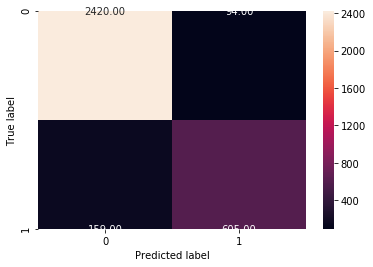

In [49]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [50]:
test_predicted_prob=pd.DataFrame(lc.predict_proba(test_x))[[1]]
test_predicted_prob.columns=['prob']
actual=test_y.reset_index(drop=True)


# making a DataFrame with actual and prob columns
df_test_predict = pd.concat([actual, test_predicted_prob], axis=1)
df_test_predict.columns = ['actual','prob']
df_test_predict.head()

,actual,prob
0,False,0.168701
1,False,0.005736
2,False,0.014669
3,False,0.040842
4,True,0.275632


In [51]:
test_roc_like_df = pd.DataFrame()
test_temp = df_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    
    accuracy=(test_temp['tp'].sum()+test_temp['tn'].sum()) / (test_temp['tp'].sum() + test_temp['fn'].sum()+test_temp['tn'].sum() + test_temp['fp'].sum())
    
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity,accuracy]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity','accuracy']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

In [52]:
test_roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.233069
0,0.020408,0.993455,0.472156,0.593655
0,0.040816,0.981675,0.685760,0.754728
0,0.061224,0.969895,0.773667,0.819402
0,0.081633,0.962042,0.821798,0.854484


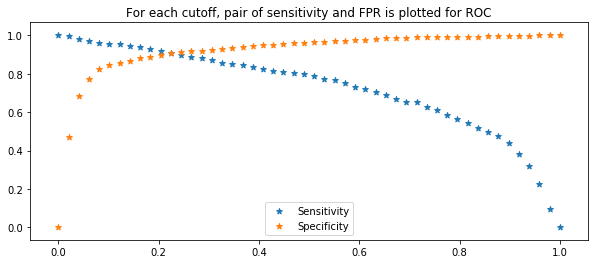

In [53]:
test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
#plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [54]:
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['accuracy']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.122449,0.954188,0.857597,0.88011,1.834298


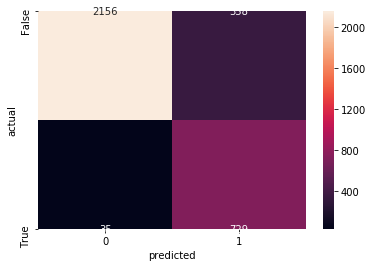

In [55]:
df_test_predict['predicted'] = df_test_predict['prob'].apply(lambda x: 1 if x > 0.122449 else 0)

import seaborn as sns
sns.heatmap(pd.crosstab(df_test_predict['actual'], df_test_predict['predicted']), annot=True, fmt='.0f')

In [56]:
accuracy=metrics.accuracy_score(df_test_predict.actual, df_test_predict.predicted)
print('Accuracy: ',round(accuracy,2))

Accuracy:  0.88


### using Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
rt=RandomForestClassifier()

In [60]:
params={'n_estimators':[100,200,300,400,500]}

In [61]:
# finding best parameters
grid=GridSearchCV(RandomForestClassifier(),n_jobs=-1,cv=10,param_grid=params)

In [62]:
grid.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [63]:
grid.best_params_

{'n_estimators': 200}

In [64]:
rt=RandomForestClassifier(n_estimators=300,n_jobs=-1)

In [65]:
rt.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [66]:
rt.predict(test_x)

array([False, False, False, ..., False,  True, False])

### Model evaluation

In [67]:
metrics.accuracy_score(rt.predict(test_x),test_y)

0.9383770591824283

In [68]:
cm=metrics.confusion_matrix(rt.predict(test_x),test_y)

In [69]:
cm

array([[2453,  141],
       [  61,  623]], dtype=int64)

In [70]:
test_accuracy=metrics.accuracy_score(test_y,rt.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,rt.predict(train_x))
print('train_accuracy: ',train_accuracy)


test_accuracy:  0.9383770591824283
train_accuracy:  0.9998692297633058


In [71]:
from sklearn.metrics import classification_report
print(classification_report(test_y,rt.predict(test_x)))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      2514
        True       0.91      0.82      0.86       764

    accuracy                           0.94      3278
   macro avg       0.93      0.90      0.91      3278
weighted avg       0.94      0.94      0.94      3278



Text(0.5, 15.0, 'Predicted label')

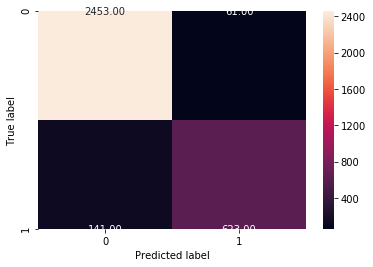

In [72]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            rt.predict(test_x), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Using SVM

In [73]:
from sklearn.svm import SVC

In [74]:
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
SVM.predict(test_x)

array([False, False, False, ..., False,  True, False])

In [76]:
metrics.accuracy_score(SVM.predict(test_x),test_y)

0.9200732153752288

###   #4 Similarity Of Jobs using clustering



In [77]:
data.Title

0                                  Chief Financial Officer
1        Full-time Community Connections Intern (paid i...
2                                      Country Coordinator
3                                           BCC Specialist
4                                       Software Developer
                               ...                        
18996                      Senior Creative UX/ UI Designer
18997                         Category Development Manager
18998                        Operational Marketing Manager
18999                      Head of Online Sales Department
19000                           Lawyer in Legal Department
Name: Title, Length: 19001, dtype: object

In [78]:
train_x.shape

(7647, 376)

In [79]:
X.shape

(10925, 376)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
from sklearn.cluster import KMeans

In [82]:
tf=TfidfVectorizer(max_features = 2000, min_df = 0.01, max_df = 0.9,stop_words='english')

In [83]:
data.Title.dropna(inplace=True)

In [84]:
tf.fit(data.Title.values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=2000,
                min_df=0.01, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [85]:
feat=tf.fit_transform(data.Title.values).toarray()

In [86]:
cls=KMeans(n_clusters=5,random_state=1234)

In [87]:
cls.fit(feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [88]:
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(feat)
    cluster_errors.append( clusters.inertia_ )


In [89]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

,num_clusters,cluster_errors
0,1,15723.753352
1,2,14714.910675
2,3,13633.365422
3,4,12761.541186
4,5,12192.560137
5,6,11526.614340
6,7,10897.270624
7,8,10326.115586
8,9,10116.550280
9,10,10065.522685


<Figure size 864x432 with 0 Axes>

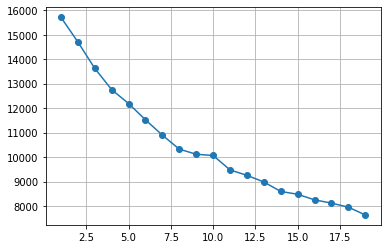

<Figure size 864x432 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.figure(figsize=(12,6))

In [91]:
cls.n_clusters

5

### Silhouette Coefficient

In [92]:
from sklearn import metrics

In [93]:
# calculate SC for K=3 through K=12
k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

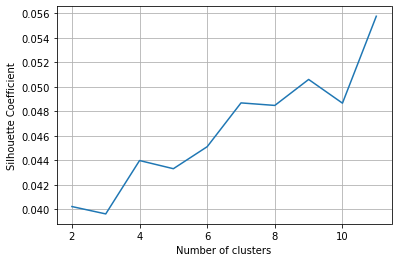

In [94]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [95]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i,:5]:
        print(' %s' % terms[ind]),

        

Top terms per cluster:
Cluster 0:
 office
 manager
 assistant
 administrator
 coordinator
Cluster 1:
 specialist
 marketing
 senior
 department
 development
Cluster 2:
 developer
 software
 senior
 net
 java
Cluster 3:
 accountant
 chief
 senior
 assistant
 financial
Cluster 4:
 manager
 engineer
 assistant
 sales
 officer
